<a href="https://colab.research.google.com/github/shahanayasim/clustering/blob/main/abc_NLP_Clusture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/datasets/abcnews-date-text.csv',usecols=['headline_text'],nrows=10000)
df

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers
...,...
9995,us units attack palace as fighting rages in heart
9996,vasco win 10 goal thriller in brazil on edmundos
9997,vic bushfires inquiry begins
9998,vic govt plan aims to reduce water use


In [ ]:
txt=df.headline_text
txt

0       aba decides against community broadcasting lic...
1          act fire witnesses must be aware of defamation
2          a g calls for infrastructure protection summit
3                air nz staff in aust strike for pay rise
4           air nz strike to affect australian travellers
                              ...                        
9995    us units attack palace as fighting rages in heart
9996     vasco win 10 goal thriller in brazil on edmundos
9997                         vic bushfires inquiry begins
9998               vic govt plan aims to reduce water use
9999            vic govt urged to green light marina plan
Name: headline_text, Length: 10000, dtype: object

In [ ]:
txt=txt.str.replace('[^a-zA-Z0-9]+',' ')
txt

<ipython-input-7-4e7b82e11b12>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  txt=txt.str.replace('[^a-zA-Z0-9]+',' ')


0       aba decides against community broadcasting lic...
1          act fire witnesses must be aware of defamation
2          a g calls for infrastructure protection summit
3                air nz staff in aust strike for pay rise
4           air nz strike to affect australian travellers
                              ...                        
9995    us units attack palace as fighting rages in heart
9996     vasco win 10 goal thriller in brazil on edmundos
9997                         vic bushfires inquiry begins
9998               vic govt plan aims to reduce water use
9999            vic govt urged to green light marina plan
Name: headline_text, Length: 10000, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize  #word_tokenize is a fn so object creation is not required
import nltk
nltk.download('punkt')
stemmer=SnowballStemmer('english')
txt=txt.apply(lambda x:[stemmer.stem(token.lower())for token in word_tokenize(x)]).apply(lambda token:' '.join(token))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
txt

0          aba decid against communiti broadcast licenc
1                    act fire wit must be awar of defam
2             a g call for infrastructur protect summit
3              air nz staff in aust strike for pay rise
4             air nz strike to affect australian travel
                             ...                       
9995        us unit attack palac as fight rage in heart
9996    vasco win 10 goal thriller in brazil on edmundo
9997                          vic bushfir inquiri begin
9998               vic govt plan aim to reduc water use
9999            vic govt urg to green light marina plan
Name: headline_text, Length: 10000, dtype: object

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk
sw=stopwords.words('english')
sw

In [ ]:
txt=txt.apply(lambda x:[token for token in word_tokenize(x) if token not in sw]).apply(lambda token:' '.join(token))
txt

0            aba decid communiti broadcast licenc
1                    act fire wit must awar defam
2             g call infrastructur protect summit
3               air nz staff aust strike pay rise
4          air nz strike affect australian travel
                          ...                    
9995        us unit attack palac fight rage heart
9996    vasco win 10 goal thriller brazil edmundo
9997                    vic bushfir inquiri begin
9998            vic govt plan aim reduc water use
9999         vic govt urg green light marina plan
Name: headline_text, Length: 10000, dtype: object

In [ ]:
txt=txt.apply(lambda x:[token for token in word_tokenize(x) if len(token>2)]).apply(lambda token:' '.join(token))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(txt)
print(X)

  (0, 3746)	0.47027473375751233
  (0, 1013)	0.47799782429829546
  (0, 1514)	0.35278224419585436
  (0, 1842)	0.40673400368770146
  (0, 209)	0.5103644709222088
  (1, 1856)	0.4921756808813915
  (1, 629)	0.4729217098434841
  (1, 4268)	0.38964572098383743
  (1, 7070)	0.4256166321182425
  (1, 2535)	0.2871157610862832
  (1, 262)	0.34452777801914436
  (2, 6206)	0.5074623354708966
  (2, 5006)	0.49596149094917574
  (2, 3309)	0.603843955663636
  (2, 1130)	0.3631482545495525
  (3, 5393)	0.3692495861644266
  (3, 4686)	0.3741461197449922
  (3, 6148)	0.36739568634284775
  (3, 607)	0.34866622943612224
  (3, 6044)	0.4277020550173569
  (3, 4430)	0.40208786385924333
  (3, 337)	0.3500257078782516
  (4, 6568)	0.44944321996923414
  (4, 611)	0.37607286792801303
  (4, 301)	0.45226706383696247
  :	:
  (9996, 2202)	0.45768961176398615
  (9996, 6812)	0.45768961176398615
  (9996, 973)	0.3757077417922177
  (9996, 6429)	0.36767405851111445
  (9996, 2817)	0.357688616391089
  (9996, 0)	0.3469575730820101
  (9996, 704

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

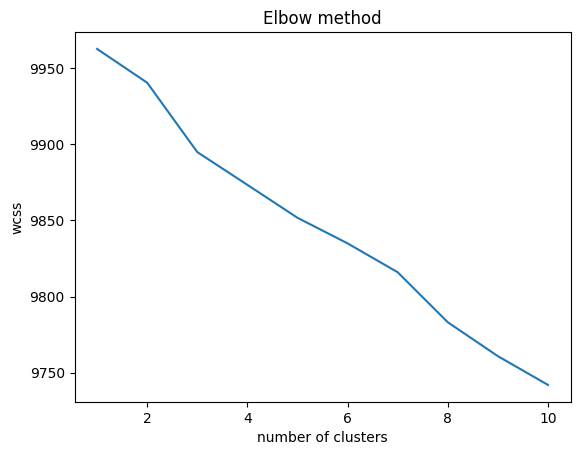

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,random_state=1)
  km.fit(X)
  wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show

In [ ]:
km=KMeans(n_clusters=9,random_state=1)
y=km.fit_predict(X)
y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([8, 8, 8, ..., 8, 1, 1], dtype=int32)

In [ ]:
df['Cluster']=y
df

,headline_text,Cluster
0,aba decides against community broadcasting lic...,8
1,act fire witnesses must be aware of defamation,8
2,a g calls for infrastructure protection summit,8
3,air nz staff in aust strike for pay rise,8
4,air nz strike to affect australian travellers,8
...,...,...
9995,us units attack palace as fighting rages in heart,6
9996,vasco win 10 goal thriller in brazil on edmundos,0
9997,vic bushfires inquiry begins,8
9998,vic govt plan aims to reduce water use,1
